In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
–ú–µ—Ç–æ–¥ k –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ—Ç —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –æ—Ç –Ω–æ–≤–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞ –¥–æ –≤—Å–µ—Ö –æ–±—ä–µ–∫—Ç–æ–≤ –≤—ã–±–æ—Ä–∫–∏ –∏, –æ—Ç–±–∏—Ä–∞—è k –±–ª–∏–∂–∞–π—à–∏—Ö, –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é —Å –ø–æ–º–æ—â—å—é –≥–æ–ª–æ—Å–æ–≤–∞–Ω–∏—è (–≤ —Å–ª—É—á–∞–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏) –∏–ª–∏ —É—Å—Ä–µ–¥–Ω–µ–Ω–∏—è (–≤ —Å–ª—É—á–∞–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏). \
–ü—Ä–∏ —ç—Ç–æ–º —ç—Ç–æ—Ç –º–µ—Ç–æ–¥ –º–æ–∂–Ω–æ –ø–æ-—Ä–∞–∑–Ω–æ–º—É –Ω–∞—Å—Ç—Ä–∞–∏–≤–∞—Ç—å, –Ω–∞–ø—Ä–∏–º–µ—Ä –º–æ–∂–Ω–æ –∏–∑–º–µ–Ω–∏—Ç—å —Å–ø–æ—Å–æ–± –ø–æ–¥—Å—á–µ—Ç–∞ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π –∏–ª–∏ —Å–ø–æ—Å–æ–± –≤–∑–≤–µ—à–∏–≤–∞–Ω–∏—è —Å–æ—Å–µ–¥–µ–π –ø–æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—é. \
–î–ª—è –Ω–∞—á–∞–ª–∞ —Å–∫–∞—á–∞–µ–º –¥–∞—Ç–∞—Å–µ—Ç –∏ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ.

In [2]:
circ = pd.read_csv('concertriccir2.csv')
circ.head()

X      Y  class
0  0.70 -0.247    0.0
1 -3.95  2.740    1.0
2  0.15 -2.160    1.0
3 -1.67 -0.942    1.0
4  2.56 -1.850    1.0

In [3]:
circ.shape

(500, 3)

In [4]:
X_ = circ.drop('class', axis=1)
y_ = circ['class']

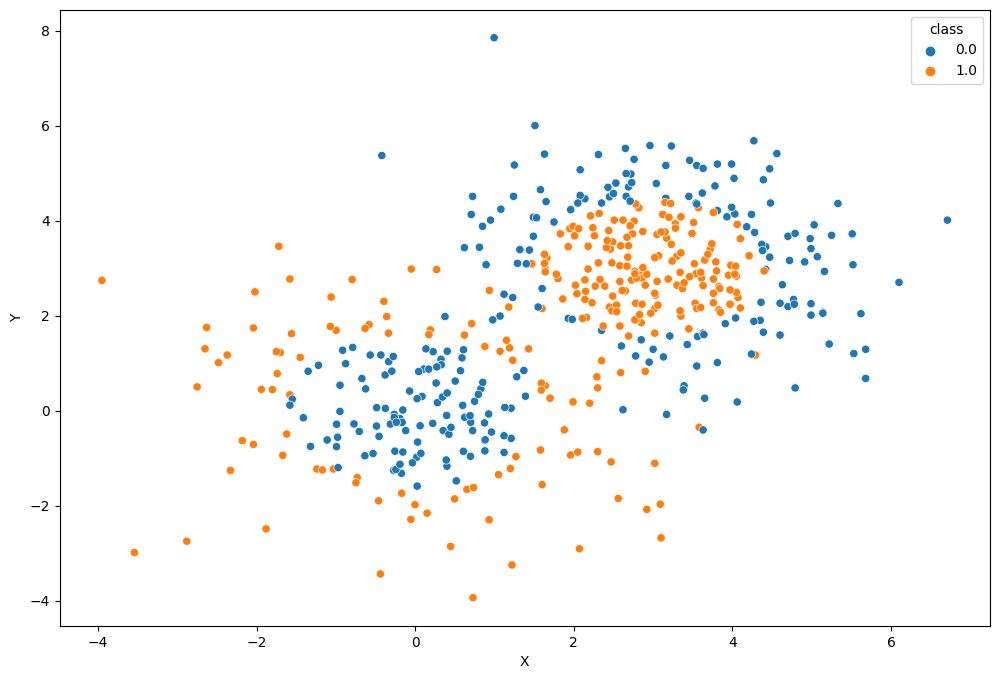

In [5]:
sns.scatterplot(circ['X'], circ['Y'], hue=circ['class']);

**–ó–∞–¥–∞–Ω–∏–µ 1.** –û–±—É—á–∏—Ç–µ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é –Ω–∞ –¥–∞–Ω–Ω—ã—Ö –∏ –Ω–∞—Ä–∏—Å—É–π—Ç–µ —Ä–∞–∑–¥–µ–ª—è—é—â—É—é –≥–∏–ø–µ—Ä–ø–ª–æ—Å–∫–æ—Å—Ç—å (–ø—Ä—è–º—É—é) –Ω–∞ —Ä–∏—Å—É–Ω–∫–µ —Å –¥–∞–Ω–Ω—ã–º–∏. –ö–∞–∫ –ª–∏–Ω–µ–π–Ω—ã–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä —Å–ø—Ä–∞–≤–∏–ª—Å—è —Å –∑–∞–¥–∞—á–µ–π? –°–¥–µ–ª–∞–π—Ç–µ –≤—ã–≤–æ–¥ –∏—Å—Ö–æ–¥—è –∏–∑ –≥–µ–æ–º–µ—Ç—Ä–∏–∏ –¥–∞–Ω–Ω—ã—Ö –∏ –ª–∏–Ω–∏–∏ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è. –ö–∞–∫–æ–π accuracy –≤—ã–π–¥–µ—Ç –Ω–∞ –≤—Å–µ–π –≤—ã–±–æ—Ä–∫–µ (–±–µ–∑ –≤–∞–ª–∏–¥–∞—Ü–∏–∏)?

In [6]:
from sklearn.linear_model import LogisticRegression

### Your code is here

logreg = LogisticRegression()
logreg.fit(X_, y_)

LogisticRegression()

In [7]:
from sklearn.metrics import classification_report 
print(classification_report(y_true=y_, y_pred=logreg.predict(X_), digits=3))
print(f"accuracy: {logreg.score(X_, y_)}")

              precision    recall  f1-score   support

         0.0      0.432     0.484     0.457       250
         1.0      0.414     0.364     0.387       250

    accuracy                          0.424       500
   macro avg      0.423     0.424     0.422       500
weighted avg      0.423     0.424     0.422       500

accuracy: 0.424


In [8]:
#print(logreg.coef_.T, logreg.intercept_[0])

<AxesSubplot: >

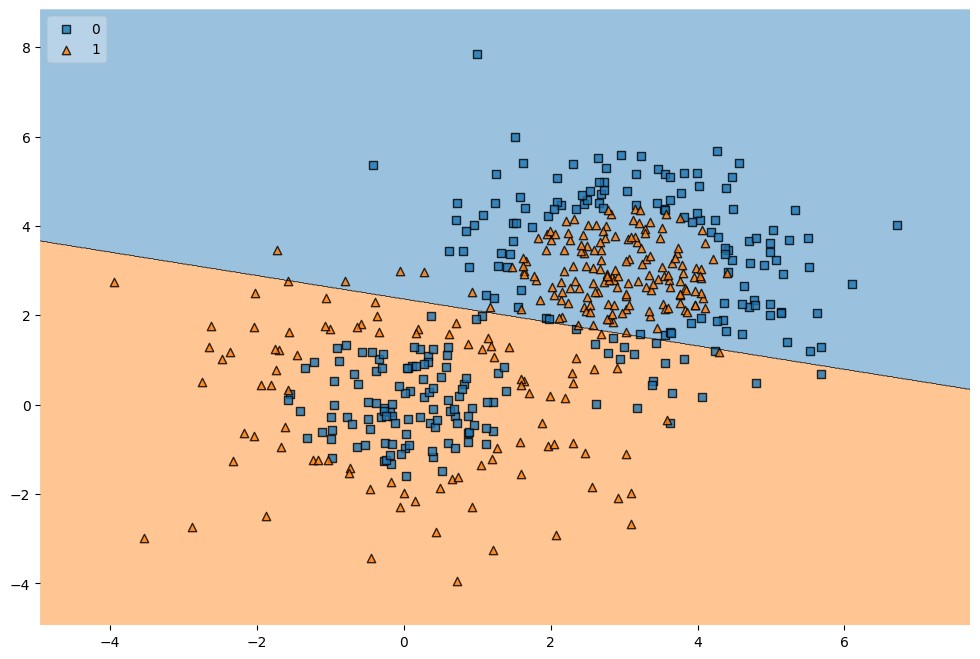

In [9]:
# –∑–¥–µ—Å—å –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å –≥—Ä–∞—Ñ–∏–∫!!!
#!pip install pip install mlxtend
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X_.values, y=y_.values.astype('int'), clf=logreg, legend=2)

**–ó–∞–¥–∞–Ω–∏–µ 2.** –†–∞–∑–¥–µ–ª–∏—Ç–µ –æ–±—É—á–∞—é—â—É—é –≤—ã–±–æ—Ä–∫—É –∏ –æ–±—É—á–∏—Ç–µ 6 –º–æ–¥–µ–ª–µ–π kNN —Å —Ä–∞–∑–ª–∏—á–Ω—ã–º —á–∏—Å–ª–æ–º —Å–æ—Å–µ–¥–µ–π –∏–∑ `all_k`, —Å–æ—Ö—Ä–∞–Ω–∏—Ç–µ –æ–±—É—á–µ–Ω–Ω—ã–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä—ã –≤ —Å–ø–∏—Å–æ–∫. \
–í—ã–≤–µ–¥–∏—Ç–µ accuracy –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ –¥–ª—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏. –ö–∞–∫–æ–≤–æ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ —Å–æ—Å–µ–¥–µ–π —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è accuracy?

In [10]:
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [12]:
#!pip install imblearn
from sklearn.neighbors import KNeighborsClassifier
all_k = [1, 3, 10, 30, 40, 60]

### Your code is here

for K in all_k:
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    print(f"{K=}, {knn.score(X_test, y_test):.3f}, {knn.score(X_train, y_train):.3f}")

K=1, 0.890, 1.000
K=3, 0.870, 0.948
K=10, 0.850, 0.915
K=30, 0.740, 0.853
K=40, 0.750, 0.800
K=60, 0.730, 0.693


In [13]:
__

LogisticRegression()

**–ó–∞–¥–∞–Ω–∏–µ 3.** (–±–æ–Ω—É—Å–Ω–æ–µ) –°–∫–∞—á–∞–π—Ç–µ –±–∏–±–ª–∏–æ—Ç–∫—É [mlxtend](http://rasbt.github.io/mlxtend/#examples) –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ —Ä–µ—à–∞—é—â–∏—Ö –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç–µ–π. 
–í –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏–∏ –º–æ–∂–Ω–æ –æ–∑–Ω–∞–∫–æ–º–∏—Ç—å—Å—è —Å [–ø—Ä–∏–º–µ—Ä–∞–º–∏](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è —Ä–µ—à–∞—é—â–∏—Ö –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç–µ–π –¥–ª—è —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π. \
–ü–æ—Å—Ç—Ä–æ–∏–º –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ç–∞–∫–∏—Ö –≥—Ä–∞—Ñ–∏–∫–æ–≤ –¥–ª—è —à–µ—Å—Ç–∏ –æ–±—É—á–µ–Ω–Ω—ã—Ö –Ω–∞–º–∏ kNN.

1. –ü–æ–¥–±–µ—Ä–∏—Ç–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã `gridspec.GridSpec()` –∏ `itertools.product()` –¥–ª—è –Ω–∞—à–µ–≥–æ —á–∏—Å–ª–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–æ–≤. 
2. –£–¥–æ–±–Ω–æ –ø–µ—Ä–µ–¥ –≤–∏–∑—É–ª–∏–∑–∞—Ü–∏–µ–π —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –æ–±—É—á–µ–Ω–Ω—ã–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä—ã –≤ —Å–ø–∏—Å–æ–∫ `all_clfs`.
3. –ü—Ä–æ—è–≤–∏—Ç–µ —Ç–µ—Ä–ø–µ–Ω–∏–µ! –û—Ç—Ä–∏—Å–æ–≤–∫–∞ —Ä–µ—à–∞—é—â–∏—Ö –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç–µ–π –º–æ–∂–µ—Ç –∑–∞–Ω–∏–º–∞—Ç—å –ø–∞—Ä—É –º–∏–Ω—É—Ç.

In [14]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

In [15]:
### Your code is here




1. –ö–∞–∫ –º–µ–Ω—è–µ—Ç—Å—è —Ä–µ—à–∞—é—â–∞—è –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç—å —Å —Ä–æ—Å—Ç–æ–º —á–∏—Å–ª–∞ —Å–æ—Å–µ–¥–µ–π?
2. –ö–∞–∫–æ–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ —Å–æ—Å–µ–¥–µ–π —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è —É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞ –¥–∞–Ω–Ω—ã—Ö –∏ –≥–µ–æ–º–µ—Ç—Ä–∏–∏ —Ä–µ—à–∞—é—â–∏—Ö –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç–µ–π? –ü–æ—è—Å–Ω–∏—Ç–µ —Å–≤–æ–π –æ—Ç–≤–µ—Ç, –æ–ø–∏—Ä–∞—è—Å—å –Ω–∞ –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –≥—Ä–∞—Ñ–∏–∫–∏.
3. –õ—É—á—à–µ –ª–∏ —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è kNN –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π?

**–ó–∞–¥–∞–Ω–∏–µ 4.** –°–∫–∞—á–∞–π—Ç–µ —É–∂–µ –∏–∑–≤–µ—Å—Ç–Ω—ã–π –≤–∞–º –¥–∞—Ç–∞—Å–µ—Ç [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). –û–±—É—á–∏—Ç–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä kNN –Ω–∞ –æ—Ç–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∏ –Ω–µ –æ—Ç–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –ø–æ–¥–æ–±—Ä–∞–≤ –ª—É—á—à–∏–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Å—Ä–µ–¥–∏ $k \in [1, 5, 10]$. –ó–∞–º–µ—Ä—å—Ç–µ –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ. \
–ü–æ—á–µ–º—É –Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –ø–æ–º–æ–≥–∞–µ—Ç —É–ª—É—á—à–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ?

In [16]:
df = pd.read_csv('processed_sigma_cabs.csv')
df.head()

Trip_Distance  Customer_Since_Months  Life_Style_Index  Customer_Rating  \
0           6.77                    1.0           2.42769          3.90500   
1          29.47                   10.0           2.78245          3.45000   
2          41.58                   10.0           2.79805          3.50125   
3          61.56                   10.0           2.79805          3.45375   
4          54.95                   10.0           3.03453          3.40250   

   Cancellation_Last_1Month  Var1  Var2  Var3  Surge_Pricing_Type  \
0                         0  40.0    46    60                   2   
1                         0  38.0    56    78                   2   
2                         2  61.0    56    77                   2   
3                         0  61.0    52    74                   3   
4                         4  51.0    49   102                   2   

   Type_of_Cab_B  ...  Destination_Type_F  Destination_Type_G  \
0              1  ...                   0                   0   
1              1  ...                   0                   0   
2              1  ...                   0                   0   
3              0  ...                   0                   0   
4              0  ...                   0                   0   

   Destination_Type_H  Destination_Type_I  Destination_Type_J  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Destination_Type_K  Destination_Type_L  Destination_Type_M  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Destination_Type_N  Gender_Male  
0                   0            0  
1                   0            1  
2                   0            1  
3                   0            1  
4                   0            1  

[5 rows x 29 columns]

In [27]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# –ø–æ–¥–±–µ—Ä–µ–º –ª—É—á—à–∏–π –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä –¥–ª—è knn

param_grid = {
    'n_neighbors': [1, 5, 10]
}

knn_2_ = KNeighborsClassifier()

search = GridSearchCV(knn_2_, param_grid, cv=5)

search.fit(X, y)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=0.46520):
{'n_neighbors': 10}


In [19]:
# –ø–æ–¥–±–µ—Ä–µ–º –ª—É—á—à–∏–π –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä –¥–ª—è knn –Ω–∞ –æ—Ç–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
param_grid_knn = {
    'KNN__n_neighbors': [1, 5, 10]
}
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('KNN', KNeighborsClassifier())])

search_2 = GridSearchCV(pipe, param_grid_knn, cv=5)
search_2.fit(X, y)

print(f"Best parameter (CV score={search_2.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=0.66109):
{'n_neighbors': 10}


**–ó–∞–¥–∞–Ω–∏–µ 5.** –û–±—É—á–∏—Ç–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä kNN –Ω–∞ –æ—Ç–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é –º–µ—Ç—Ä–∏–∫–∏ –ú–∏–Ω–∫–æ–≤—Å–∫–æ–≥–æ. 
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

–ó–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ `p` –≤–æ–∑—å–º–∏—Ç–µ —Ä–∞–≤–Ω—ã–º –µ–¥–∏–Ω–∏—Ü–µ. –ó–∞–º–µ—Ä—å—Ç–µ –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ –∏ —Å—Ä–∞–≤–Ω–∏—Ç–µ —Å –ø—Ä–µ–¥—ã–¥—É—â–∏–º –∑–∞–¥–∞–Ω–∏–µ–º, –≥–¥–µ `p = 2`.

In [ ]:
%%time
### Your code is here

pipe_m = Pipeline([('scaler', StandardScaler()), 
                 ('KNN', KNeighborsClassifier(n_neighbors=10, 
                                              metric='minkowski',
                                             p=1,
                                             n_jobs=-1)
                 )])


pipe_m.fit(X_train, y_train)

# print(f"{pipe_m.score(X_test, y_test):.3f}, {pipe_m.score(X_train, y_train):.3f}")
# print(classification_report(y_true=y_test, y_pred=pipe_m.predict(X_test), digits=3))


In [29]:
%%time
print(f"–ö–∞—á–µ—Å—Ç–≤–æ –Ω–∞ —Ç–µ—Å—Ç–µ: {pipe_m.score(X_test, y_test):.2f}, –ö–∞—á–µ—Å—Ç–≤–æ –Ω–∞ train: {pipe_m.score(X_train, y_train):.2f}")

K=60, 0.66, 0.71


In [26]:
print(f"–ö–∞—á–µ—Å—Ç–≤–æ –Ω–∞ —Ç–µ—Å—Ç–µ: {np.mean(pipe_m.predict(X_test) == y_test).round(3)}")

–ö–∞—á–µ—Å—Ç–≤–æ –Ω–∞ —Ç–µ—Å—Ç–µ: 0.661


**–ó–∞–¥–∞–Ω–∏–µ 6.** –°–∫–∞—á–∞–π—Ç–µ –¥–∞—Ç–∞—Å–µ—Ç [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), –≤ –∫–æ—Ç–æ—Ä–æ–º –º—ã –±—É–¥–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å —Å—Ä–µ–¥–Ω—é—é —Å—Ç–æ–∏–º–æ—Å—Ç—å –∂–∏–ª—å—è. –í –∫–∞—á–µ—Å—Ç–≤–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å `['longitude', 'latitude']`, –ø–æ—Å–º–æ—Ç—Ä–∏—Ç–µ –Ω–∞ –Ω–∏—Ö —Å –ø–æ–º–æ—â—å—é scatterplot. \
–ü–æ –∫–∞–∫–æ–π —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–µ –Ω–∞—à kNN —Ä–µ–≥—Ä–µ—Å—Å–æ—Ä –≤ —ç—Ç–æ–º —Å–ª—É—á–∞–µ –ø–æ–¥–±–∏—Ä–∞–µ—Ç —Å–æ—Å–µ–¥–µ–π?

1. –û–±—É—á–∏—Ç–µ –æ–±—ã–∫–Ω–æ–≤–µ–Ω–Ω—É—é –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é –∏ –∑–∞–º–µ—Ä—å—Ç–µ RMSE –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∞—Ö.
2. –û–±—É—á–∏—Ç–µ kNN —Ä–µ–≥—Ä–µ—Å—Å–æ—Ä –Ω–∞ –æ—Ç–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –ø–æ–¥–æ–±—Ä–∞–≤ –ª—É—á—à–∏–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã $k \in [1, 2, ..., 9]$. 
3. –û–±—É—á–∏—Ç–µ kNN —Ä–µ–≥—Ä–µ—Å—Å–æ—Ä —Å –≥–∞—É—Å—Å–æ–≤—Å–∫–∏–º —è–¥—Ä–æ–º, –≤–∑—è–≤ –ø–∞—Ä–∞–º–µ—Ç—Ä k –∏–∑ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –ø—É–Ω–∫—Ç–∞ –∏ –ø–æ–¥–æ–±—Ä–∞–≤ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —à–∏—Ä–∏–Ω—ã –æ–∫–Ω–∞ —Å—Ä–µ–¥–∏ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–Ω—ã—Ö $h \in np.arange(0.02, 0.1, 0.01)$.

–ö–∞–∫ —à–∏—Ä–∏–Ω–∞ –æ–∫–Ω–∞ –≤–ª–∏—è–µ—Ç –Ω–∞ –≤–µ—Å–∞ –ø—Ä–∏ —É—Å—Ä–µ–¥–Ω–µ–Ω–∏–∏ –æ—Ç–≤–µ—Ç–∞ –ø–æ —Å–æ—Å–µ–¥—è–º? 

In [30]:
df = pd.read_csv('housing.csv')
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

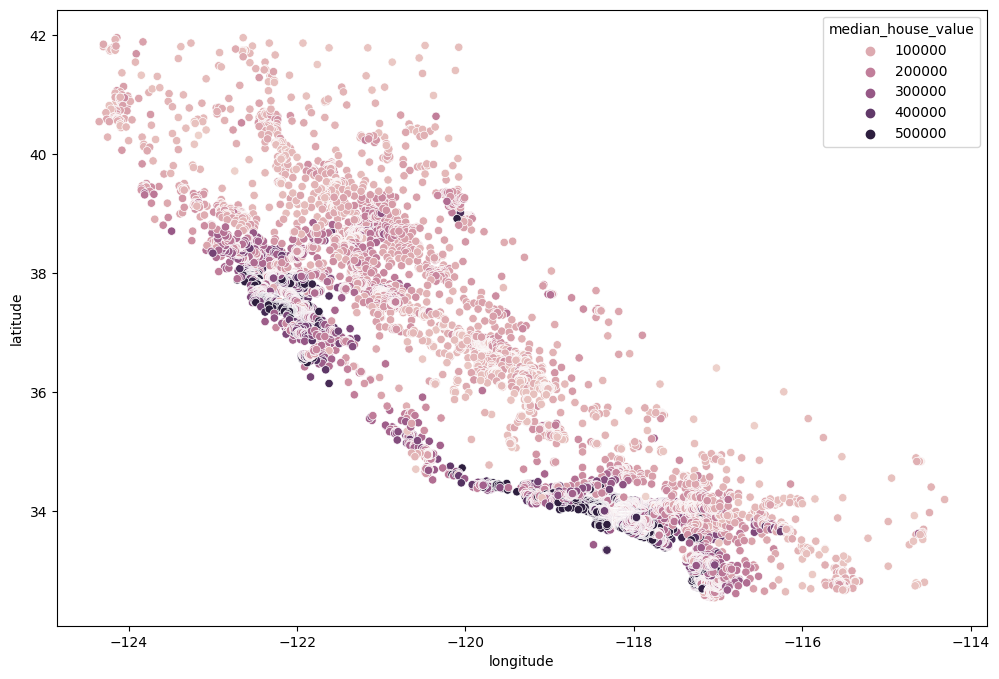

In [31]:
X = df[['longitude', 'latitude']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)
sns.scatterplot('longitude', 'latitude', data=X, hue=y);

In [40]:
%%time
### Your code is here
### –û–±—É—á–∏—Ç–µ kNN —Ä–µ–≥—Ä–µ—Å—Å–æ—Ä –Ω–∞ –æ—Ç–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –ø–æ–¥–æ–±—Ä–∞–≤ –ª—É—á—à–∏–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã ùëò‚àà[1,2,...,9]
from sklearn.neighbors import KNeighborsRegressor
param_grid_knn = {
    'KNN__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}
pipe_house = Pipeline([('scaler', StandardScaler()), 
                 ('KNN', KNeighborsRegressor())])

search_3 = GridSearchCV(pipe_house, param_grid_knn, cv=5, n_jobs=-1)
search_3.fit(X, y)

print(f"Best parameter (CV score={search_3.best_score_:.5f}):")
print(search_3.best_params_)


Best parameter (CV score=0.14442):
{'KNN__n_neighbors': 10}
CPU times: user 61.3 ms, sys: 15.9 ms, total: 77.2 ms
Wall time: 356 ms


In [52]:
### –®–∏—Ä–∏–Ω–∞ –ì–∞—É—Å—Å–æ–≤—Å–∫–æ–≥–æ —è–¥—Ä–∞
from sklearn.neighbors import KernelDensity
k=1

for h in [0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]:
    
    def kernel(distances, h=h):
    
        const = 1 / (np.sqrt(2 * np.pi))
        power = (-1/2) * ((distances)**2) / h**2
    
        return const * np.exp(power)

    knn = KNeighborsRegressor(n_neighbors=10, weights=kernel)
    knn.fit(X_train, y_train)
#     print(f"{h=}, {knn.score(X_test, y_test):.3f}, {knn.score(X_train, y_train):.3f}")
    knn_preds = knn.predict(X_test)
    print(f"{h=},RMSE KNN –º–æ–¥–µ–ª–∏ –Ω–∞ –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö: {(np.mean((knn_preds-y_test)**2)**0.5).round(3)}")


h=0.02,RMSE KNN –º–æ–¥–µ–ª–∏ –Ω–∞ –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö: 52117.092
h=0.03,RMSE KNN –º–æ–¥–µ–ª–∏ –Ω–∞ –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö: 52284.065
h=0.04,RMSE KNN –º–æ–¥–µ–ª–∏ –Ω–∞ –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö: 52319.848
h=0.05,RMSE KNN –º–æ–¥–µ–ª–∏ –Ω–∞ –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö: 52340.23
h=0.06,RMSE KNN –º–æ–¥–µ–ª–∏ –Ω–∞ –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö: 52378.704
h=0.07,RMSE KNN –º–æ–¥–µ–ª–∏ –Ω–∞ –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö: 52418.326
h=0.08,RMSE KNN –º–æ–¥–µ–ª–∏ –Ω–∞ –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö: 52451.64
h=0.09,RMSE KNN –º–æ–¥–µ–ª–∏ –Ω–∞ –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö: 52477.749


`–ü—Ä–∏ —É–≤–µ–ª–∏—á–µ–Ω–∏–∏ —Ä–∞–∑–º–µ—Ä–∞ –æ–∫–Ω–∞ RMSE —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è`